<a href="https://colab.research.google.com/github/krivosheymax/MNIST-1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0__neur1_2_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
nn1 = 80
nn2 = 108
nn3 = 156
nn4 = 244
nn5 = 319
nn6 = 435
nn7 = 2000
nn8 = 500
nc = 10

bs = 64
lr = 0.0001
ep = 70

dev = "cuda"
#dev='cpu'

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

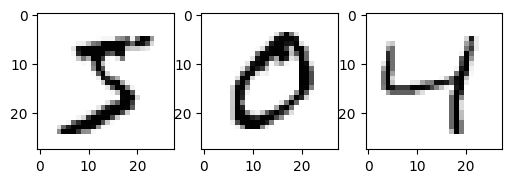

In [ ]:
plt.figure(figsize=(6,6))
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.imshow(X[i].reshape(28, 28), cmap="Greys")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
train_dset = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
train_loader =  torch.utils.data.DataLoader(train_dset, batch_size=bs)

In [ ]:
test_dset = torch.utils.data.TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())
test_loader =  torch.utils.data.DataLoader(test_dset, batch_size=bs)

In [ ]:
class FCN(nn.Module):
  def __init__(self):
    super(FCN, self).__init__()
    self.cc1 = nn.Conv2d(1, nn1, 5)
    self.cc2 = nn.Conv2d(nn1, nn2, 5)
    self.cc3 = nn.Conv2d(nn2, nn3, 5)
    self.cc4 = nn.Conv2d(nn3, nn4, 5)
    self.cc5 = nn.Conv2d(nn4, nn5, 3)
    self.cc6 = nn.Conv2d(nn5, nn6, 3)
    self.fc1 = nn.Linear(27840, nn7)
    self.fc2 = nn.Linear(nn7, nn8)
    self.fc3 = nn.Linear(nn8, nc)

  def forward(self, x):
    z1 = F.relu(self.cc1(x))
    z2 = F.relu(self.cc2(z1))
    z3 = F.relu(self.cc3(z2))
    z4 = F.relu(self.cc4(z3))
    z5 = F.relu(self.cc5(z4))
    z6 = F.relu(self.cc6(z5))
    #print(z6.shape)
    z6 = z6.reshape(z6.shape[0], z6.shape[1]*z6.shape[2]*z6.shape[3])
    #print(z6.shape)
    z7 = F.dropout(F.relu(self.fc1(z6)), p=0.005)
    z8 = F.relu(self.fc2(z7))
    z9 = self.fc3(z8)
    return z9

In [ ]:
net = FCN()

In [ ]:
net.to(dev)

FCN(
  (cc1): Conv2d(1, 80, kernel_size=(5, 5), stride=(1, 1))
  (cc2): Conv2d(80, 108, kernel_size=(5, 5), stride=(1, 1))
  (cc3): Conv2d(108, 156, kernel_size=(5, 5), stride=(1, 1))
  (cc4): Conv2d(156, 244, kernel_size=(5, 5), stride=(1, 1))
  (cc5): Conv2d(244, 319, kernel_size=(3, 3), stride=(1, 1))
  (cc6): Conv2d(319, 435, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=27840, out_features=2000, bias=True)
  (fc2): Linear(in_features=2000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
)

In [ ]:
crit = nn.CrossEntropyLoss()
opt = torch.optim.Adam(net.parameters(), lr=lr)

In [ ]:
q = []
tot = len(train_loader)
for i in range(ep):
    for j, (a, b) in enumerate(train_loader):
      a = a.to(dev)
      b = b.to(dev)
      #print(a.shape)
      a = a.reshape(a.shape[0], 1, 28, 28)
      #print(a.shape, a[0])
      out = net(a)
      loss = crit(out, b)
      opt.zero_grad()
      loss.backward()
      opt.step()
      if(j+1)%200==0:
        q.append(loss.item())
        print('Epoch {}/{} Step {}/{} LossL{:.4f}'.format(i+1, ep, j+1, tot, loss.item()))
plt.scatter(range(len(q)), q, s=3, c='black')

Epoch 1/70 Step 200/938 LossL0.0519
Epoch 1/70 Step 400/938 LossL0.2622
Epoch 1/70 Step 600/938 LossL0.1188
Epoch 1/70 Step 800/938 LossL0.0135
Epoch 2/70 Step 200/938 LossL0.0528
Epoch 2/70 Step 400/938 LossL0.1231
Epoch 2/70 Step 600/938 LossL0.0357
Epoch 2/70 Step 800/938 LossL0.0711
Epoch 3/70 Step 200/938 LossL0.0312
Epoch 3/70 Step 400/938 LossL0.1055
Epoch 3/70 Step 600/938 LossL0.0645
Epoch 3/70 Step 800/938 LossL0.0241
Epoch 4/70 Step 200/938 LossL0.0068
Epoch 4/70 Step 400/938 LossL0.0589
Epoch 4/70 Step 600/938 LossL0.0230
Epoch 4/70 Step 800/938 LossL0.0015
Epoch 5/70 Step 200/938 LossL0.0168
Epoch 5/70 Step 400/938 LossL0.0537
Epoch 5/70 Step 600/938 LossL0.0341
Epoch 5/70 Step 800/938 LossL0.1191
Epoch 6/70 Step 200/938 LossL0.0132
Epoch 6/70 Step 400/938 LossL0.1111
Epoch 6/70 Step 600/938 LossL0.0263
Epoch 6/70 Step 800/938 LossL0.0003
Epoch 7/70 Step 200/938 LossL0.0059
Epoch 7/70 Step 400/938 LossL0.0248
Epoch 7/70 Step 600/938 LossL0.1426
Epoch 7/70 Step 800/938 Loss

KeyboardInterrupt: 

In [ ]:
net.eval()
with torch.no_grad():
  cur, tot = 0, 0
  for a, b in test_loader:
    a = a.to(dev)
    b = b.to(dev)
    a = a.reshape(a.shape[0], 1, 28, 28)
    out = net(a)
    _, pred = torch.max(out, dim=1)
    tot+=b.shape[0]
    cur+=(pred==b).sum().item()
  print('accuracy:', cur/tot)

accuracy: 0.9943
